In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

In [4]:
# Load the dataset
df = pd.read_csv("loan_approval_dataset.csv")

In [6]:
# Drop loan_id as it is not useful for prediction
df.drop(columns=["loan_id"], inplace=True)

In [8]:
# Handling missing values (Filling with median for numerical and mode for categorical)
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
# Encoding categorical variables
le = LabelEncoder()
df[' education'] = le.fit_transform(df[' education'])
df[' self_employed'] = le.fit_transform(df[' self_employed'])
df[' loan_status'] = le.fit_transform(df[' loan_status'])

In [12]:
# Splitting features and target
X = df.drop(columns=[' loan_status'])
y = df[' loan_status']

In [14]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [20]:
# Random Forest Classifier Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

In [22]:
# XGBoost Classifier Model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

C:\Users\KIIT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:31:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
# Function to print evaluation metrics
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [26]:
# Evaluate all models
evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest Classifier")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost Classifier")


Logistic Regression Performance:
Accuracy: 0.905152224824356
Precision: 0.8785942492012779
Recall: 0.8647798742138365
F1 Score: 0.8716323296354992
ROC AUC Score: 0.9674798178916737
Confusion Matrix:
 [[498  38]
 [ 43 275]]

Random Forest Classifier Performance:
Accuracy: 0.977751756440281
Precision: 0.9776357827476039
Recall: 0.9622641509433962
F1 Score: 0.9698890649762282
ROC AUC Score: 0.9984834084295504
Confusion Matrix:
 [[529   7]
 [ 12 306]]

XGBoost Classifier Performance:
Accuracy: 0.9824355971896955
Precision: 0.9809523809523809
Recall: 0.9716981132075472
F1 Score: 0.976303317535545
ROC AUC Score: 0.998486341875528
Confusion Matrix:
 [[530   6]
 [  9 309]]


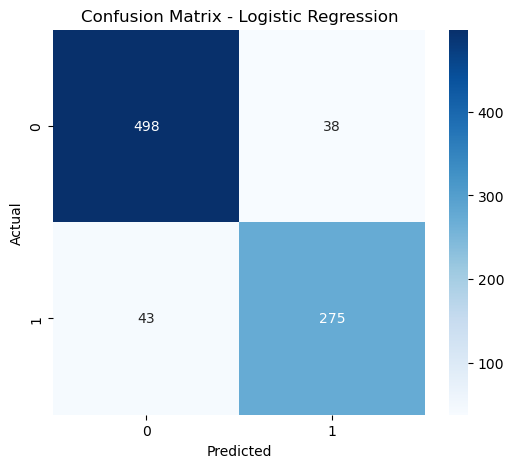

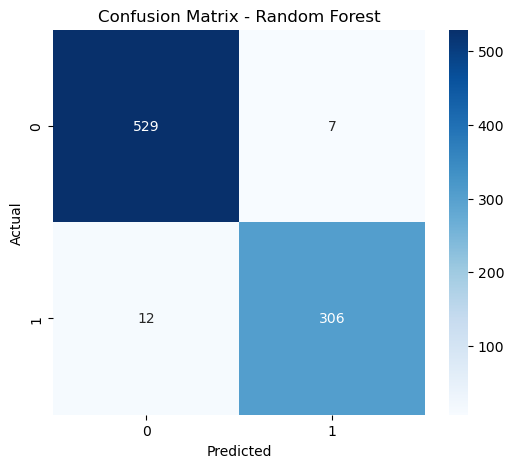

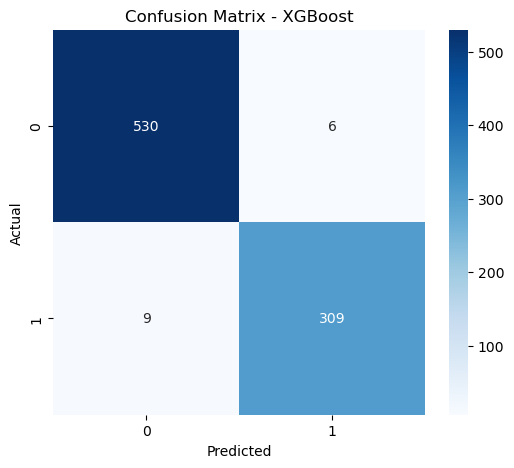

In [28]:
# Plot Confusion Matrices
for model_name, y_pred in zip(["Logistic Regression", "Random Forest", "XGBoost"], 
                              [y_pred_log, y_pred_rf, y_pred_xgb]):
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

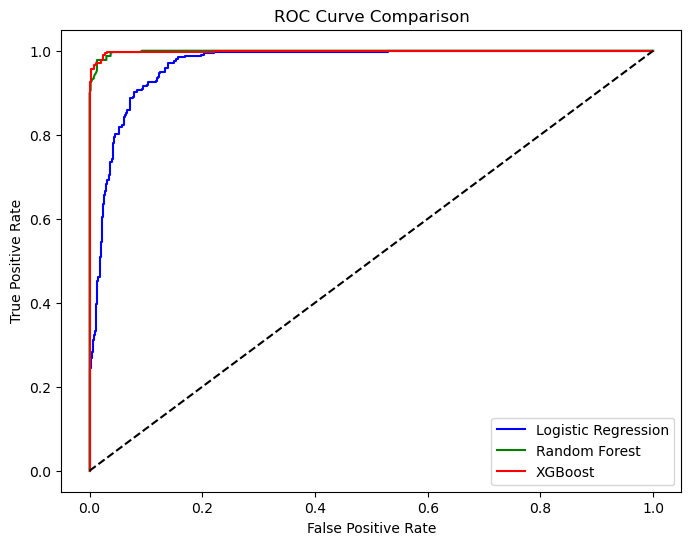

In [30]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr_log, tpr_log, label='Logistic Regression', color='blue')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='green')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

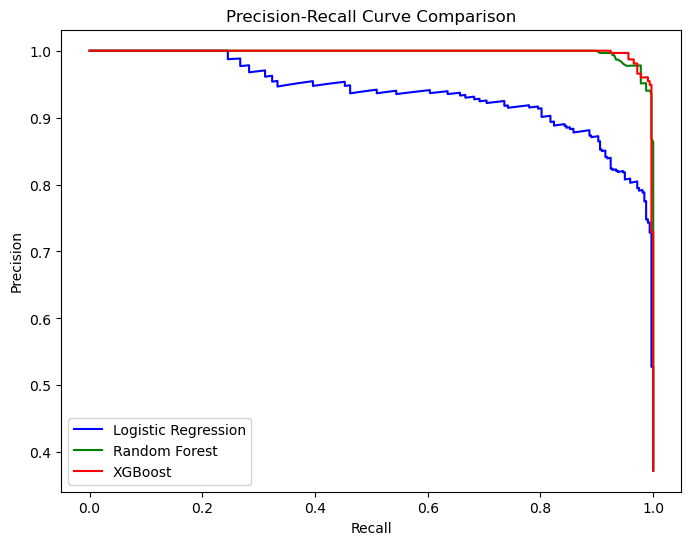

In [32]:
# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
prec_log, recall_log, _ = precision_recall_curve(y_test, y_prob_log)
prec_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
prec_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
plt.plot(recall_log, prec_log, label='Logistic Regression', color='blue')
plt.plot(recall_rf, prec_rf, label='Random Forest', color='green')
plt.plot(recall_xgb, prec_xgb, label='XGBoost', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6536\2162822275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='magma')


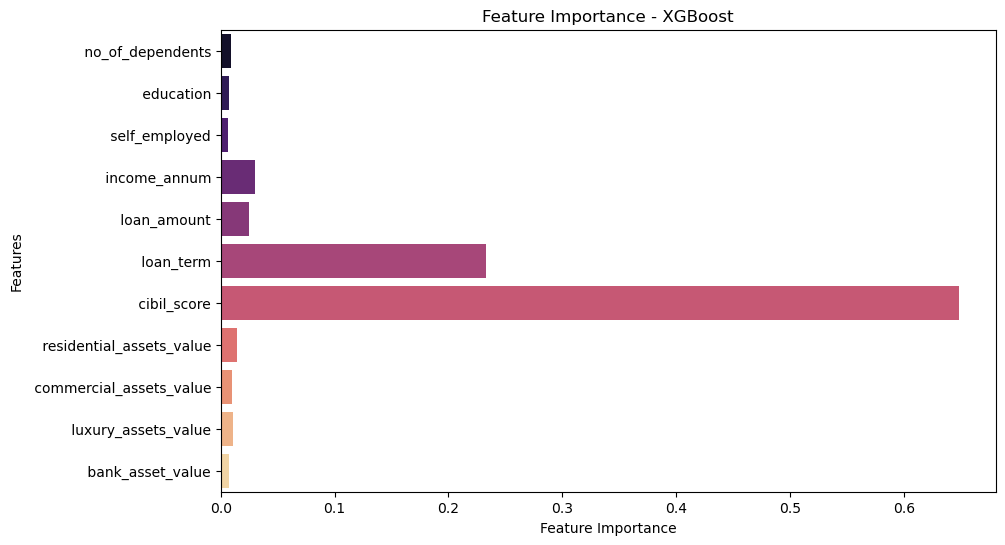

In [34]:
# Plot Feature Importance for XGBoost
plt.figure(figsize=(10, 6))
importances = xgb_clf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette='magma')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - XGBoost')
plt.show()

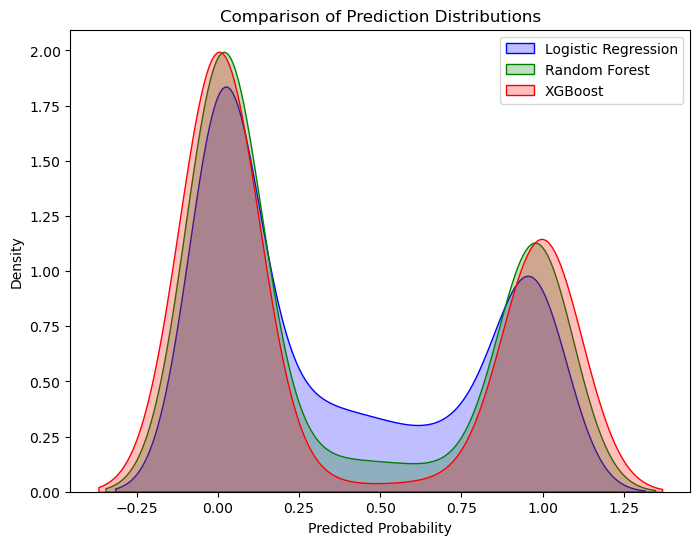

In [36]:
# Comparison of Prediction Distributions for All Models
plt.figure(figsize=(8, 6))
sns.kdeplot(y_prob_log, label="Logistic Regression", color="blue", fill=True)
sns.kdeplot(y_prob_rf, label="Random Forest", color="green", fill=True)
sns.kdeplot(y_prob_xgb, label="XGBoost", color="red", fill=True)
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.title("Comparison of Prediction Distributions")
plt.legend()
plt.show()